## Data loading
Load the ERCOT wind dataset.

In [1]:
# load in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('ercot_historical_wind_generation_data.csv', index_col='timestamp', parse_dates=True)
df

,wind_system,wind_coast,wind_south,wind_west,wind_north
timestamp,,,,,
2021-01-01 01:00:00,14012.32,1975.35,1246.65,7623.01,146.97
2021-01-01 02:00:00,14315.26,2023.05,980.89,7778.31,174.87
2021-01-01 03:00:00,14247.88,1819.02,742.39,8068.91,211.95
2021-01-01 04:00:00,13273.42,1426.17,750.18,7543.59,186.87
2021-01-01 05:00:00,12248.01,1280.43,825.16,6667.16,169.53
...,...,...,...,...,...
2023-12-31 19:00:00,14308.86,3073.89,819.51,8655.73,561.02
2023-12-31 20:00:00,17164.47,2917.42,1038.65,11066.57,782.17
2023-12-31 21:00:00,18302.32,2761.19,1519.15,11578.04,1112.40


# Clean the dataset

In [56]:
# Find duplicates
duplicates = df.index.duplicated().sum()
print(f"Number of duplicate timestamps: {duplicates}")

Number of duplicate timestamps: 6


In [58]:
# clean the data
df = df[~df.index.duplicated(keep='first')]
df.dropna().describe()

,wind_system,wind_coast,wind_south,wind_west,wind_north
count,25450.000000,25450.000000,25450.000000,25450.000000,25450.000000
mean,11927.336706,1451.606206,1297.025895,6541.208127,856.992543
std,6278.346621,1068.425497,815.402423,4170.686712,611.209242
min,37.960000,0.000000,0.000000,0.850000,0.000000
25%,6526.327500,494.295000,581.355000,2732.590000,315.167500
50%,11638.210000,1277.550000,1248.735000,6302.790000,773.015000
75%,17165.837500,2339.340000,1949.382500,10128.262500,1311.170000
max,31981.490000,3948.750000,3345.650000,20077.410000,2412.930000


# Data Exploration and Analysis 

Hour with highest average wind generation: 0:00
Average generation at that hour: 14573.10 MW


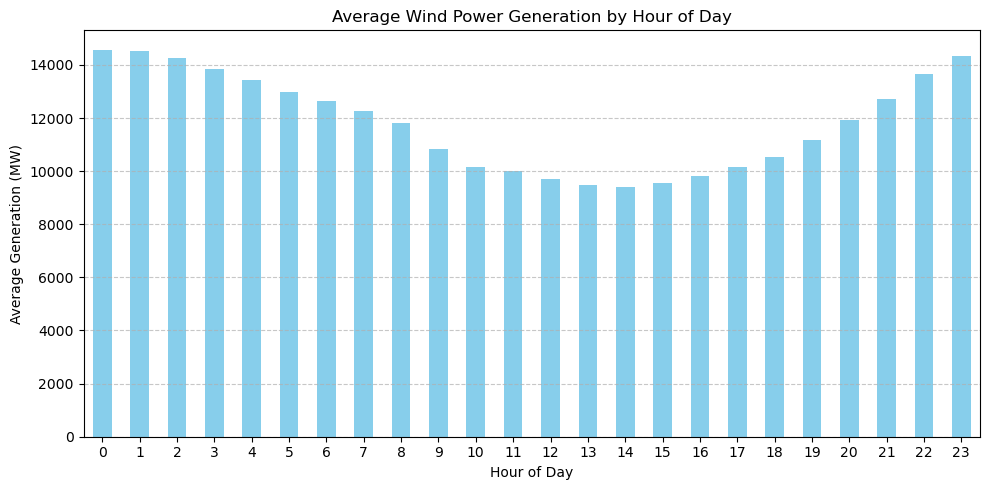

In [79]:
# Extract the hour from the timestamp
df['hour'] = df.index.hour

# Group by hour and calculate the average wind generation for each hour
avg_by_hour = df.groupby('hour')['wind_system'].mean()

# Find the hour with the highest average wind generation
peak_hour = avg_by_hour.idxmax()
peak_value = avg_by_hour.max()

print(f"Hour with highest average wind generation: {peak_hour}:00")
print(f"Average generation at that hour: {peak_value:.2f} MW")

# Optional: Plot the hourly average
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
avg_by_hour.plot(kind='bar', color='skyblue')
plt.title('Average Wind Power Generation by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Generation (MW)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


wind_coast: Peak hour = 18:00, Avg = 1965.11 MW
wind_south: Peak hour = 23:00, Avg = 1723.44 MW
wind_west: Peak hour = 1:00, Avg = 8286.17 MW
wind_north: Peak hour = 1:00, Avg = 1102.17 MW


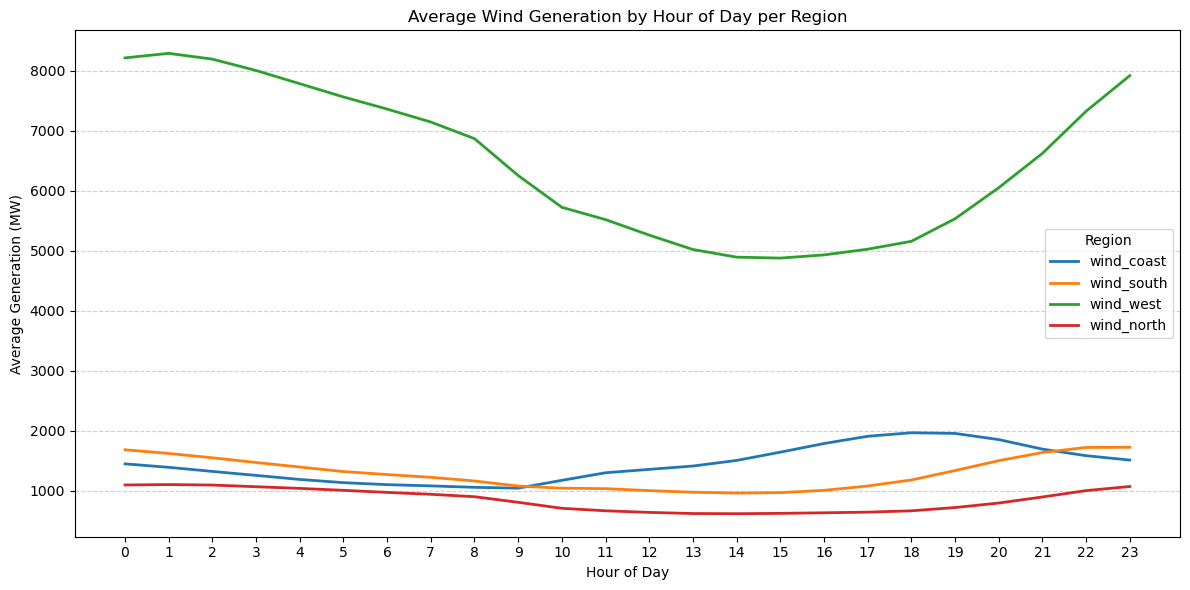

In [81]:
import pandas as pd
import matplotlib.pyplot as plt


# Add hour column
df['hour'] = df.index.hour

# Regions to analyze
regions = ['wind_coast', 'wind_south', 'wind_west', 'wind_north']

# Group by hour and calculate the mean for each region
avg_by_hour_per_region = df.groupby('hour')[regions].mean()

# Find peak hour for each region
peak_hours = avg_by_hour_per_region.idxmax()
peak_values = avg_by_hour_per_region.max()

# Display results
for region in regions:
    print(f"{region}: Peak hour = {peak_hours[region]}:00, Avg = {peak_values[region]:.2f} MW")

# Plotting
avg_by_hour_per_region.plot(figsize=(12, 6), linewidth=2)
plt.title('Average Wind Generation by Hour of Day per Region')
plt.xlabel('Hour of Day')
plt.ylabel('Average Generation (MW)')
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


correlation matrix: Investigate if there’s any correlation between wind generation in different regions. 
For example, do regions like the Coastal and South regions tend to generate wind power at the same time, 
or are there independent patterns?

In [12]:
corr_matrix = df[['wind_coast', 'wind_south', 'wind_west', 'wind_north']].corr()
print(corr_matrix)

            wind_coast  wind_south  wind_west  wind_north
wind_coast    1.000000    0.638562   0.185453    0.331450
wind_south    0.638562    1.000000   0.544999    0.587556
wind_west     0.185453    0.544999   1.000000    0.767991
wind_north    0.331450    0.587556   0.767991    1.000000


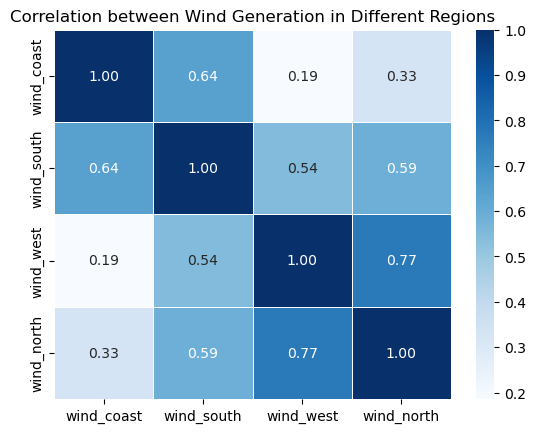

In [14]:
# visualize this matrix

import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Wind Generation in Different Regions')
plt.show()

This code is performing a rolling average (or moving average) on wind energy data from different regions to visualize trends over time. 

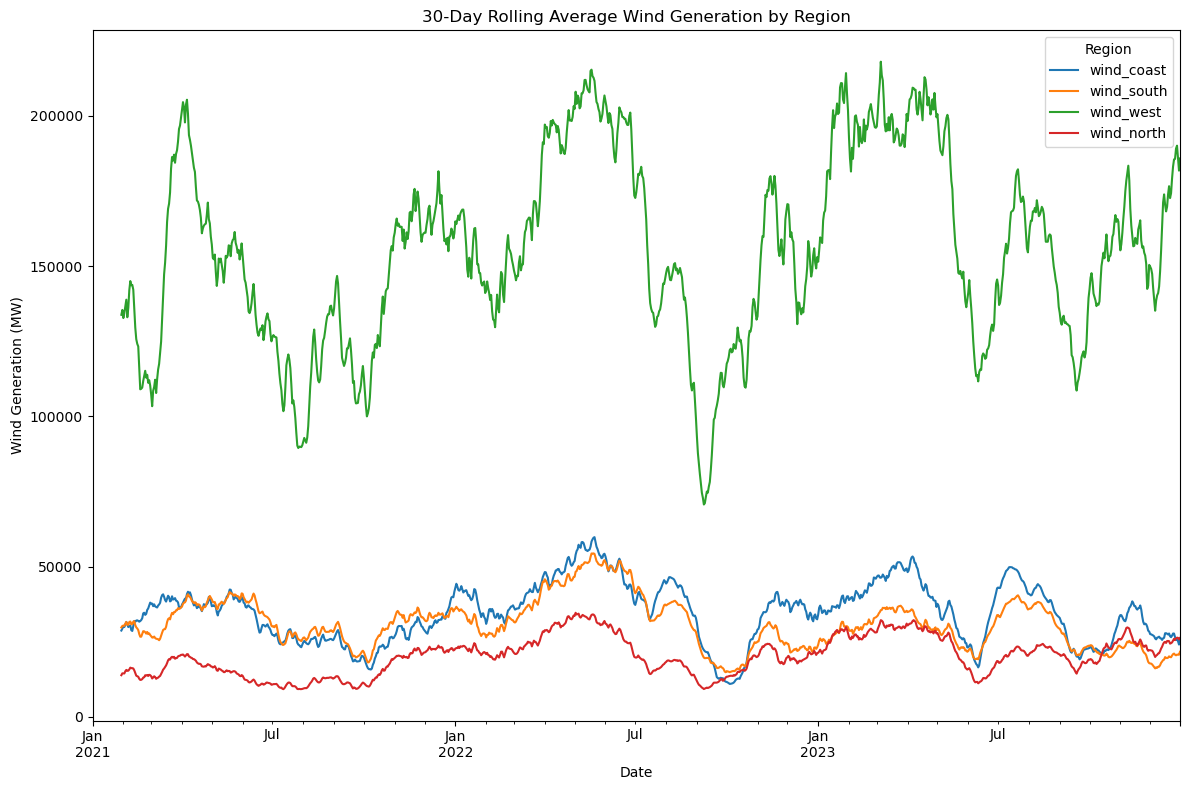

In [21]:
# Resample the original DataFrame to daily frequency, summing values within each day
daily_df = df.resample('D').sum()

# Calculate the 30-day rolling average for wind generation across selected regions
# This smooths short-term fluctuations and highlights longer-term trends
rolling_mean = daily_df[['wind_coast', 'wind_south', 'wind_west', 'wind_north']].rolling(window=30).mean()

# Plot the rolling averages with a specified figure size
rolling_mean.plot(figsize=(12, 8))
plt.title('30-Day Rolling Average Wind Generation by Region')
plt.ylabel('Wind Generation (MW)')
plt.xlabel('Date')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

This code creates barplots to visualize the distribution of wind generation data for four different regions (coast, south, west, and north). 

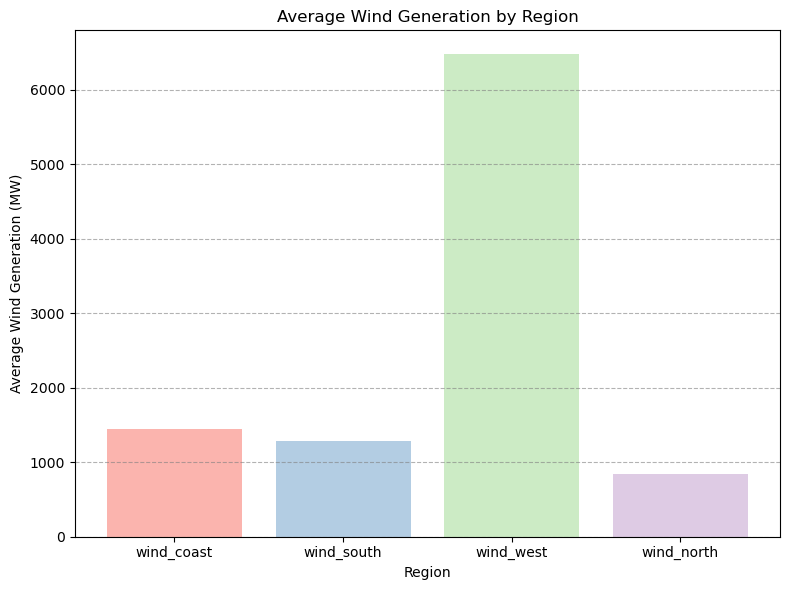

In [25]:
# Bar plot of average wind generation by region

# Define regions
regions = ['wind_coast', 'wind_south', 'wind_west', 'wind_north']

# Compute average wind generation for each region
avg_wind_gen = [df[f'{region}'].mean() for region in regions]

# Get colors from the 'Pastel1' palette
colors = sns.color_palette("Pastel1", len(regions))

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(regions, avg_wind_gen, color=colors)
plt.xlabel('Region')
plt.ylabel('Average Wind Generation (MW)')
plt.title('Average Wind Generation by Region')
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')
plt.tight_layout()
plt.show()


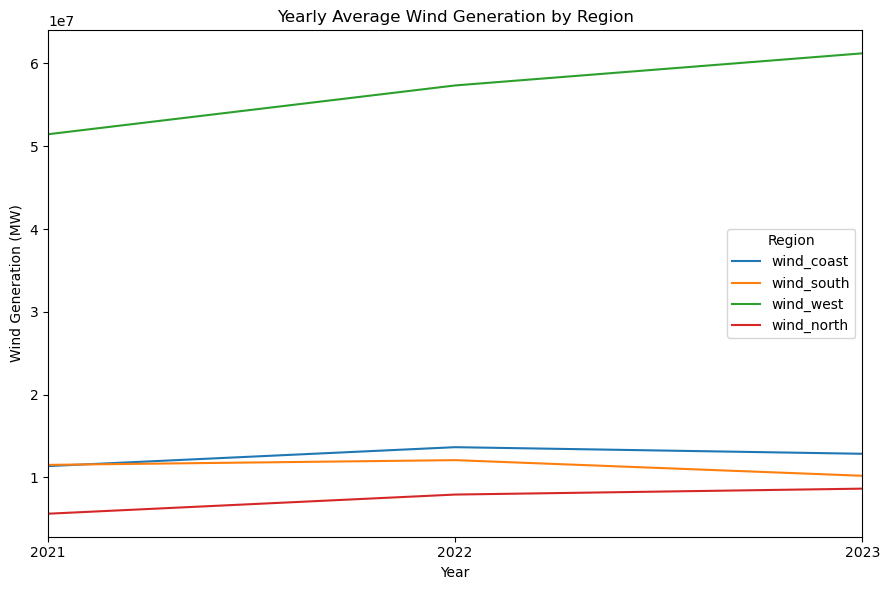

In [35]:
# yearly mean wind generation per region
yearly_mean = df.resample('YE').sum()
yearly_mean[['wind_coast', 'wind_south', 'wind_west', 'wind_north']].plot(figsize=(9, 6))
plt.title('Yearly Average Wind Generation by Region')
plt.ylabel('Wind Generation (MW)')
plt.xlabel('Year')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [37]:
# keep the timestamp but condense into months
monthly_mean = df.resample('ME').mean()
monthly_mean.head()

,wind_system,wind_coast,wind_south,wind_west,wind_north
timestamp,,,,,
2021-01-31,10363.355343,1207.223997,1247.805868,5614.814145,597.511507
2021-02-28,8913.554970,1566.404092,1093.833943,4318.579003,534.928795
2021-03-31,14112.851617,1532.843787,1524.336927,8276.372574,861.648854
2021-04-30,12383.411222,1598.759417,1653.461542,6659.749069,701.461333
2021-05-31,12256.096949,1631.965094,1670.926048,6396.162460,567.346989


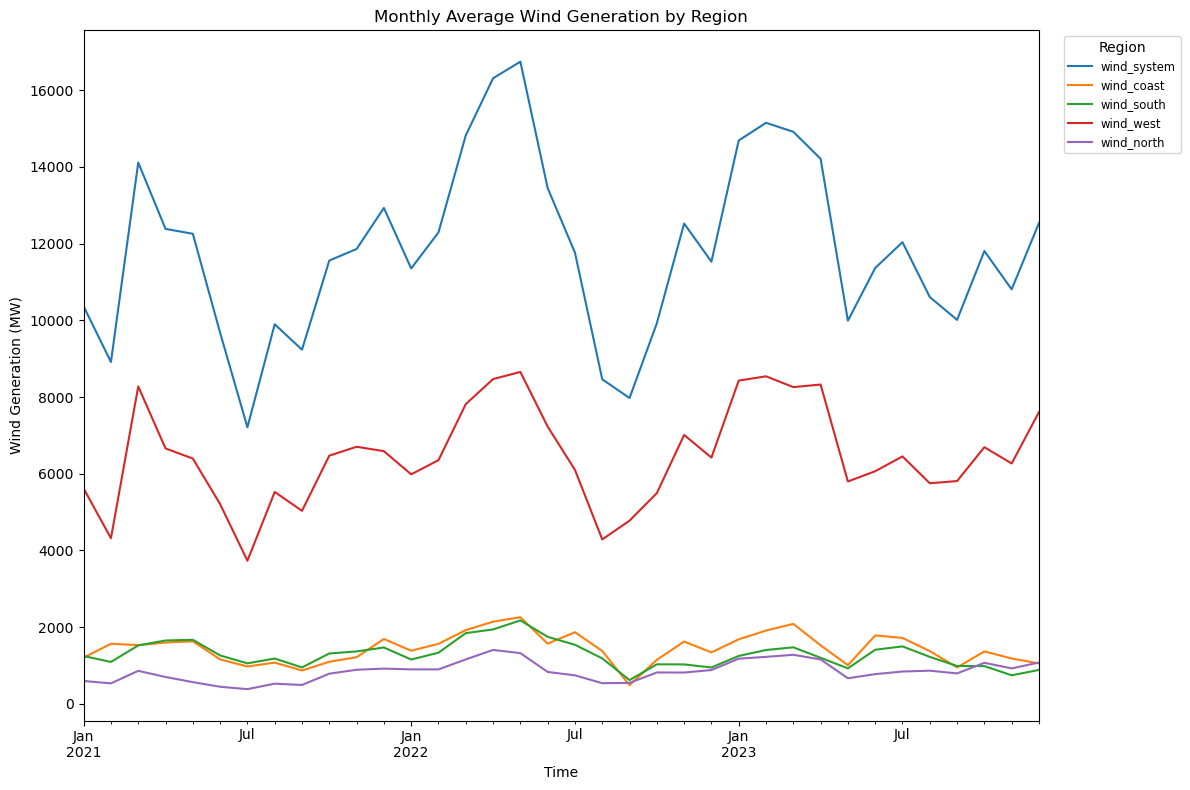

In [45]:
# Plot monthly mean with larger figure size and smaller legend
monthly_mean.plot(figsize=(12, 8))  # Make the plot larger
plt.title('Monthly Average Wind Generation by Region')
plt.xlabel('Time')
plt.ylabel('Wind Generation (MW)')

# Customize the legend: make font smaller and place it outside the plot
plt.legend(title='Region', fontsize='small', title_fontsize='medium', loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

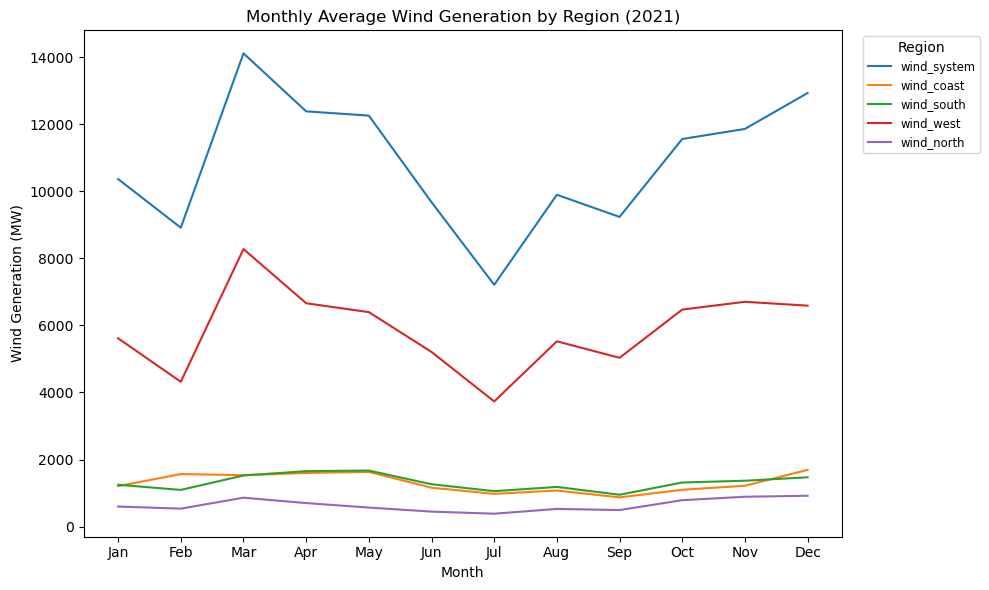

In [47]:
# plot the monthly avg wind generation by region in 2021

# Filter data for only 2021
df_2021 = df[(df.index >= '2021-01-01') & (df.index < '2022-01-01')]

# Group by month and calculate mean
monthly_2021 = df_2021.groupby(df_2021.index.month).mean()

# Plot each region
fig, ax = plt.subplots(figsize=(10, 6))
monthly_2021[['wind_system', 'wind_coast', 'wind_south', 'wind_west', 'wind_north']].plot(
    ax=ax,
    title='Monthly Average Wind Generation by Region (2021)',
    xticks=range(1, 13),
    style=['-', '-', '-', '-', '-']
)

ax.set_xlabel('Month')
ax.set_ylabel('Wind Generation (MW)')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.legend(title='Region', fontsize='small', title_fontsize='medium', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

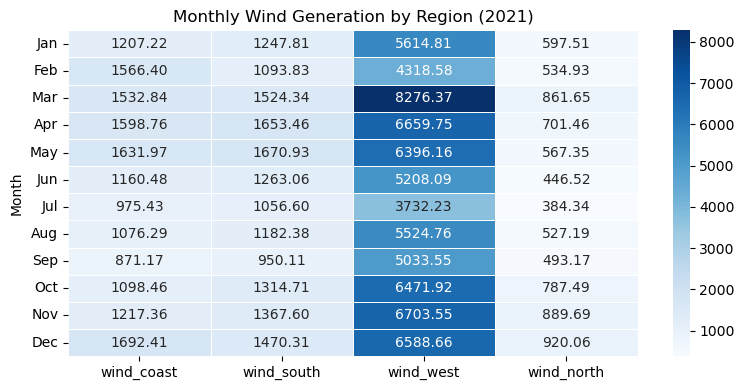

In [67]:
# Heatmap of wind generation by region for each month of 2021
plt.figure(figsize=(8, 4))  # Optional: make the plot larger
ax = sns.heatmap(
    monthly_2021[['wind_coast', 'wind_south', 'wind_west', 'wind_north']],
    annot=True,
    cmap='Blues',
    fmt='.2f',
    linewidths=0.5
)

# Set axis labels and custom month names
ax.set_ylabel("Month")
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Set title
plt.title('Monthly Wind Generation by Region (2021)')

# Display the heatmap
plt.tight_layout()
plt.show()


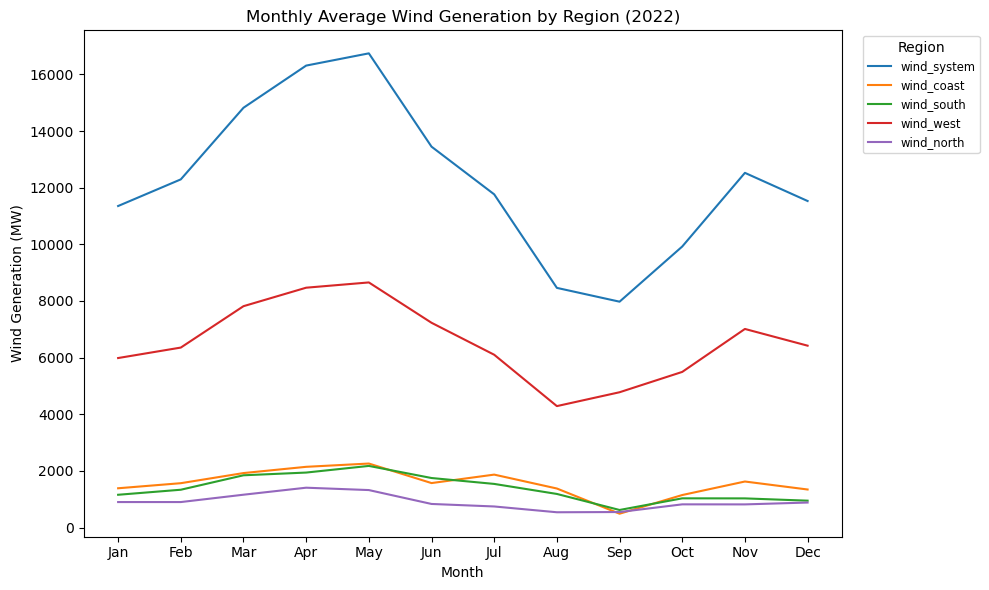

In [55]:
# plot the monthly avg wind generation by region in 2022

# Filter data for only 2022
df_2022 = df[(df.index >= '2022-01-01') & (df.index < '2023-01-01')]

# Group by month and calculate mean
monthly_2022 = df_2022.groupby(df_2022.index.month).mean()

# Plot each region
fig, ax = plt.subplots(figsize=(10, 6))
monthly_2022[['wind_system', 'wind_coast', 'wind_south', 'wind_west', 'wind_north']].plot(
    ax=ax,
    title='Monthly Average Wind Generation by Region (2022)',
    xticks=range(1, 13),
    style=['-', '-', '-', '-', '-']
)

ax.set_xlabel('Month')
ax.set_ylabel('Wind Generation (MW)')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.legend(title='Region', fontsize='small', title_fontsize='medium', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

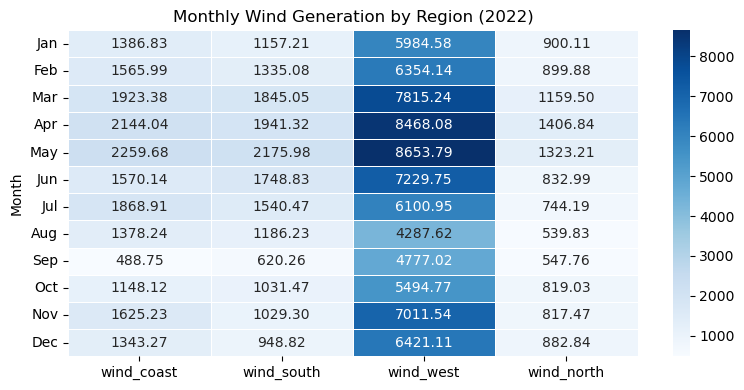

In [65]:
# Heatmap of wind generation by region for each month of 2022
plt.figure(figsize=(8, 4))  # Optional: make the plot larger
ax = sns.heatmap(
    monthly_2022[['wind_coast', 'wind_south', 'wind_west', 'wind_north']],
    annot=True,
    cmap='Blues',
    fmt='.2f',
    linewidths=0.5
)

# Set axis labels and custom month names
ax.set_ylabel("Month")
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Set title
plt.title('Monthly Wind Generation by Region (2022)')

# Display the heatmap
plt.tight_layout()
plt.show()


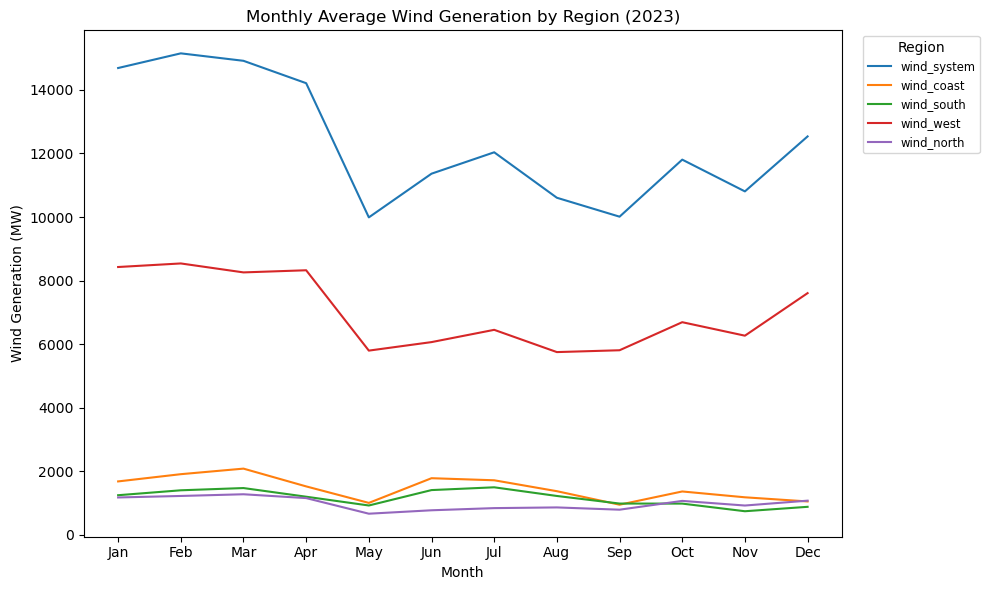

In [71]:
# plot the monthly avg wind generation by region in 2023

# Filter data for only 2023
df_2023 = df[(df.index >= '2023-01-01')]

# Group by month and calculate mean
monthly_2023 = df_2023.groupby(df_2023.index.month).mean()

# Plot each region
fig, ax = plt.subplots(figsize=(10, 6))
monthly_2023[['wind_system', 'wind_coast', 'wind_south', 'wind_west', 'wind_north']].plot(
    ax=ax,
    title='Monthly Average Wind Generation by Region (2023)',
    xticks=range(1, 13),
    style=['-', '-', '-', '-', '-']
)

ax.set_xlabel('Month')
ax.set_ylabel('Wind Generation (MW)')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.legend(title='Region', fontsize='small', title_fontsize='medium', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

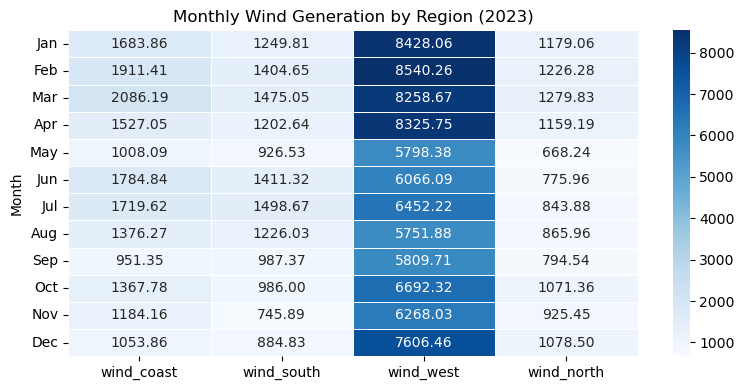

In [73]:
# Heatmap of wind generation by region for each month of 2023
plt.figure(figsize=(8, 4))  # Optional: make the plot larger
ax = sns.heatmap(
    monthly_2023[['wind_coast', 'wind_south', 'wind_west', 'wind_north']],
    annot=True,
    cmap='Blues',
    fmt='.2f',
    linewidths=0.5
)

# Set axis labels and custom month names
ax.set_ylabel("Month")
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Set title
plt.title('Monthly Wind Generation by Region (2023)')

# Display the heatmap
plt.tight_layout()
plt.show()


In [75]:
monthly_mean.describe()

,wind_system,wind_coast,wind_south,wind_west,wind_north
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,11823.579636,1444.051853,1287.609032,6475.691290,845.923486
std,2299.568841,390.290238,338.470020,1297.213810,261.971479
min,7211.453508,488.752486,620.259931,3732.233965,384.340753
25%,10005.946649,1157.388156,1030.931605,5717.611530,650.558371
50%,11784.835645,1456.936912,1248.806442,6408.637298,838.438099
75%,13059.146738,1685.998088,1480.954389,7323.929435,961.924224
max,16741.770309,2259.681882,2175.981519,8653.791452,1406.843917
